In [1]:
%matplotlib inline

# TfLinearRegression

A implementation of Ordinary Least Squares simple and multiple linear regression using TensorFlow.

> from mlxtend.tf_regressor import TfLinearRegression

## Overview

The linear regression model is fitted using gradient descent optimization supporting simple and multiple linear regression; for more information on linear regression, please refer to the documentation of the related 
[`mlxtend.regressor.LinearRegression estimator`](../regressor/LinearRegression.md) and the tutorials:

- [Gradient Descent and Stochastic Gradient Descent](../general_concepts/gradient-optimization.md)
- [Deriving the Gradient Descent Rule for Linear Regression and Adaline](../general_concepts/linear-gradient-derivative.md).

### References


- F. Galton. [Regression towards mediocrity in hereditary stature](http://www.jstor.org/stable/2841583). Journal of the Anthropological Institute of Great Britain and Ireland, pages 246–263, 1886.
- A. I. Khuri. [Introduction to linear regression analysis](http://onlinelibrary.wiley.com/doi/10.1111/insr.12020_10/abstract), by Douglas C. Montgomery, Elizabeth A. Peck, G. Geoffrey Vining. International Statistical Review, 81(2):318–319, 2013.
- D. S. G. Pollock. [The Classical Linear Regression Model](http://www.le.ac.uk/users/dsgp1/COURSES/MESOMET/ECMETXT/06mesmet.pdf).

## Example 1 - Simple Linear Regression

### Generate some sample data

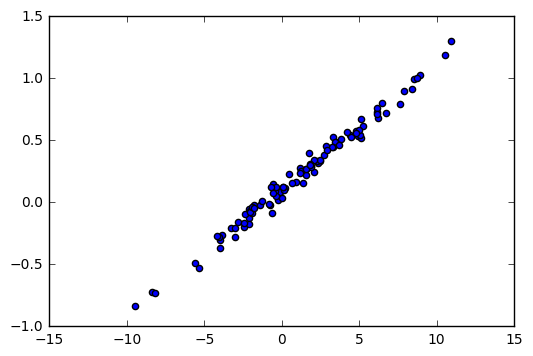

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.array([np.random.normal(1.0, 4.55) for i in range(100)])
y = np.array([x1 * 0.1 + 0.1 + np.random.normal(0.0, 0.05) for x1 in X])
X = X[:, np.newaxis]

plt.scatter(X, y)
plt.show()

### Fit regressor and check MSE cost

Iteration: 5/5 | Cost 2.40 | Elapsed: 00:00:00 | ETA: 00:00:00

Intercept: 0.10
Slope: 0.39


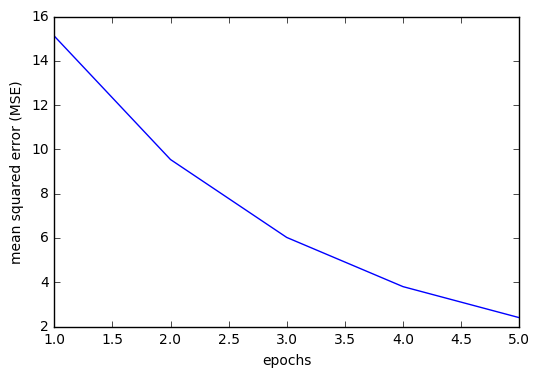

In [3]:
from mlxtend.tf_regressor import TfLinearRegression

gd_lr = TfLinearRegression(eta=0.05, 
                           epochs=5,
                           random_seed=1,
                           print_progress=3)
gd_lr.fit(X, y)

print('Intercept: %.2f' % gd_lr.b_)
print('Slope: %.2f' % gd_lr.w_)

plt.plot(range(1, gd_lr.epochs+1), gd_lr.cost_)
plt.xlabel('epochs')
plt.ylabel('mean squared error (MSE)')
plt.show()

### Continue training for another 50 epochs

Iteration: 50/50 | Cost 0.00 | Elapsed: 0:00:00 | ETA: 0:00:00

Intercept: 0.11
Slope: 0.10


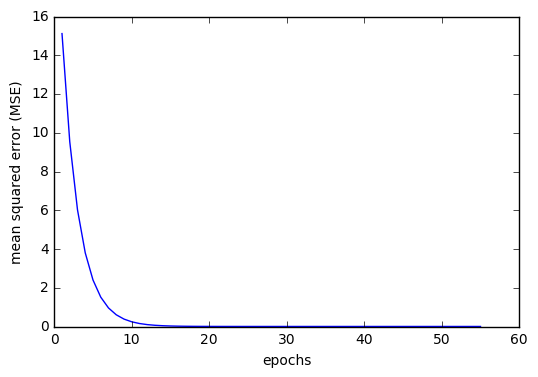

In [4]:
gd_lr.epochs = 50
gd_lr.fit(X, y, init_params=False)

print('Intercept: %.2f' % gd_lr.b_)
print('Slope: %.2f' % gd_lr.w_)

plt.plot(range(1, 56), gd_lr.cost_)
plt.xlabel('epochs')
plt.ylabel('mean squared error (MSE)')
plt.show()

### Visualize the regression fit

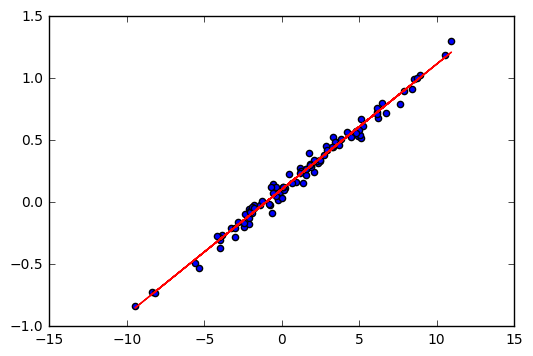

In [5]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, gd_lr)
plt.show()

 **Tip**: If we are using gradient descent, we should consider standardizing the feature variables for faster convergence:

Iteration: 10/10 | Cost 0.01 | Elapsed: 0:00:00 | ETA: 0:00:00

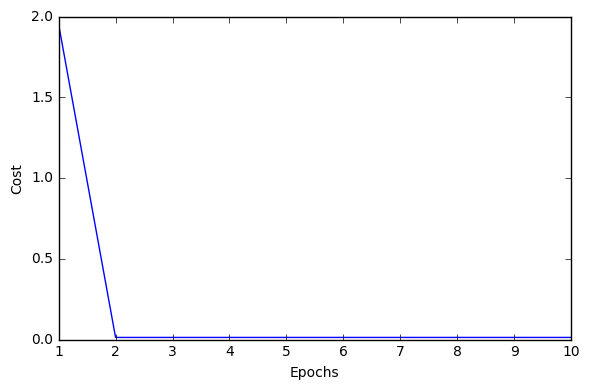

In [6]:
X_std = (X - np.mean(X)) / X.std()
y_std = (y - np.mean(y)) / y.std()
    
gd_lr = TfLinearRegression(eta=0.5, 
                           epochs=10,
                           random_seed=0,
                           print_progress=3)    
gd_lr.fit(X_std, y_std)

plt.plot(range(1, gd_lr.epochs + 1), gd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()  

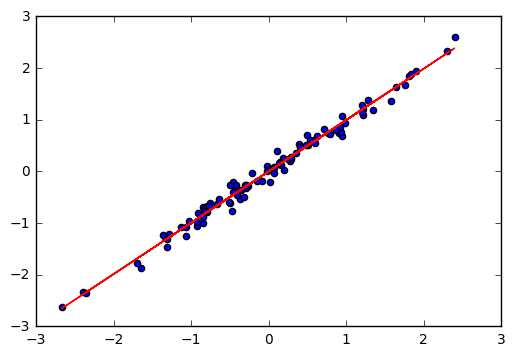

In [7]:
lin_regplot(X_std, y_std, gd_lr)
plt.show()

## Example 2 - Multiple Linear Regression

### Loading the Boston Housing Data

In [8]:
from mlxtend.data import boston_housing_data
from mlxtend.preprocessing import shuffle_arrays_unison

X, y = boston_housing_data()
X, y = shuffle_arrays_unison([X, y], random_seed=1)
X_test, y_test = X[:50], y[:50]
X_train, y_train = X[50:], y[50:]

# standardize
mu1, mu2 = X_train.mean(axis=0), y_train.mean()
sigma1, sigma2 = X_train.std(axis=0), y_train.std()
X_train = (X_train - mu1) / sigma1
X_test = (X_test - mu1) / sigma1
y_train = (y_train - mu2) / sigma2
y_test = (y_test - mu2) / sigma2

(506, 14)


### Fit the regression model

Iteration: 200/200 | Cost 0.27 | Elapsed: 0:00:00 | ETA: 0:00:00

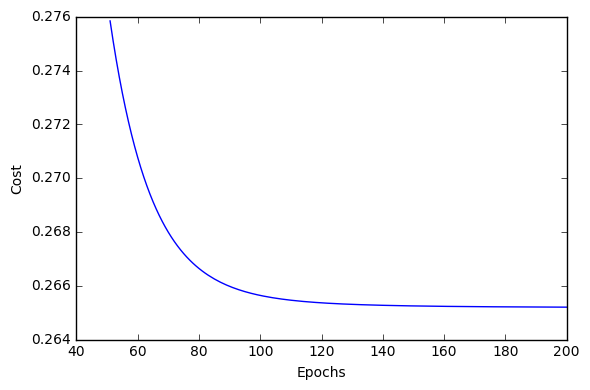

In [9]:
gd_lr = TfLinearRegression(eta=0.1, 
                           epochs=200,
                           random_seed=1,
                           print_progress=3)    

gd_lr.fit(X_train, y_train)

plt.plot(range(51, gd_lr.epochs + 1), gd_lr.cost_[50:])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()  

### Evaluate the results

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_train_pred = gd_lr.predict(X_train)
y_test_pred = gd_lr.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.265, test: 0.247
R^2 train: 0.735, test: 0.780


## API

In [11]:
with open('../../api_modules/mlxtend.tf_regressor/TfLinearRegression.md', 'r') as f:
    print(f.read())

## TfLinearRegression

*TfLinearRegression(eta=0.1, epochs=50, print_progress=0, random_seed=None, dtype=None)*

Estimator for Linear Regression in TensorFlow using Gradient Descent.

Added in version 0.4.1

### Methods

<hr>

*fit(X, y, init_params=True)*

Learn model from training data.

**Parameters**

- `X` : {array-like, sparse matrix}, shape = [n_samples, n_features]

    Training vectors, where n_samples is the number of samples and
    n_features is the number of features.

- `y` : array-like, shape = [n_samples]

    Target values.

- `init_params` : bool (default: True)

    Re-initializes model parameters prior to fitting.
    Set False to continue training with weights from
    a previous model fitting.

**Returns**

- `self` : object


<hr>

*predict(X)*

Predict class labels of X.

**Parameters**

- `X` : {array-like, sparse matrix}, shape = [n_samples, n_features]

    Training vectors, where n_samples is the number of samples and
    n_features is the number of features